## Machine Learning Online Class
Exercise 6 | Support Vector Machines

Instructions
------------

This file contains code that helps you get started on the
exercise. You will need to complete the following functions:

- gaussianKernel.py
- dataset3Params.py
- processEmail.py
- emailFeatures.py

For this exercise, you will not need to change any code in this file,
or any other files other than those mentioned above.


In [1]:
%run -n main.py
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
def plotData(X, y):
    """plots the data points with + for the positive examples
    and o for the negative examples. X is assumed to be a Mx2 matrix.
    Note: This was slightly modified such that it expects y = 1 or y = 0
    """
    plt.figure(0)

# Find Indices of Positive and Negative Examples
    pos = np.where(y==1, True, False).flatten()
    neg = np.where(y==0, True, False).flatten()

# Plot Examples
    plt.plot(X[pos,0], X[pos, 1], 'k+', linewidth=1, markersize=7)
    plt.plot(X[neg,0], X[neg, 1], 'ko', color='y', markersize=7)


In [3]:
def visualizeBoundary(X, y, model):
    """plots a non-linear decision boundary learned by the
    SVM and overlays the data on it"""

# Plot the training data on top of the boundary
    plotData(X, y)

    # Make classification predictions over a grid of values
    x1plot = np.linspace(min(X[:,0]), max(X[:,0]), X.shape[0]).T
    x2plot = np.linspace(min(X[:,1]), max(X[:,1]), X.shape[0]).T
    X1, X2 = np.meshgrid(x1plot, x2plot)
    vals = np.zeros(X1.shape)

    for i in range(X1.shape[1]):
        this_X = np.column_stack((X1[:, i], X2[:, i]))
        vals[:, i] = model.predict(this_X)

    # Plot the SVM boundary
    #contour(X1, X2, vals, [0 0], 'Color', 'b')
    plt.contour(X1, X2, vals, colors='b')

In [4]:
def visualizeBoundaryLinear(X, y, model):
    """plots a linear decision boundary
    learned by the SVM and overlays the data on it
    """

    w = model.coef_.flatten()
    b = model.intercept_.flatten()
    xp = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
    yp = -(w[0]*xp + b)/w[1]
    plotData(X, y)
    plt.plot(xp, yp, '-b')

## Part 1: Loading and Visualizing Data
We start the exercise by first loading and visualizing the dataset. 
The following code will load the dataset into your environment and plot the data.

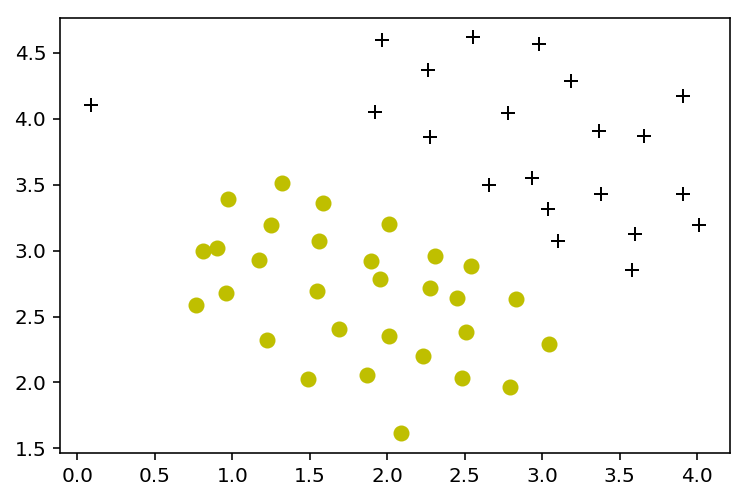

In [5]:
# Load from ex6data1: 
# You will have X, y in your environment
data = scipy.io.loadmat('data/ex6data1.mat')
X = data['X']
y = data['y'].flatten()

# Plot training data
plotData(X, y)

## Part 2: Training Linear SVM
The following code will train a linear SVM on the dataset and plot the decision boundary learned.

In [6]:
# Load from ex6data1:
# You will have X, y in your environment
data = scipy.io.loadmat('data/ex6data1.mat')
X = data['X']
y = data['y'].flatten()

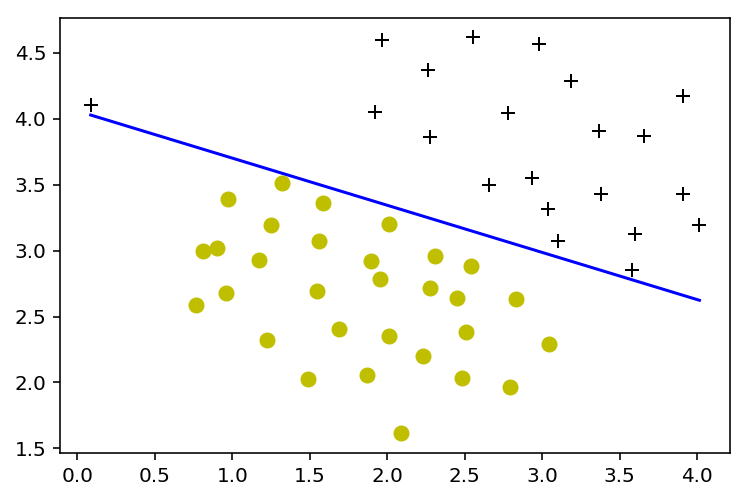

In [7]:
# You should try to change the C value below and see how the decision
# boundary varies (e.g., try C = 1000)

C = 100
clf = svm.SVC(C=C, kernel='linear')
model = clf.fit(X, y)
visualizeBoundaryLinear(X, y, model)

## Part 3: Implementing Gaussian Kernel
You will now implement the Gaussian kernel to use with the SVM. You should complete the code in gaussianKernel

To fnd non-linear decision boundaries with the SVM, we need to frst implement a Gaussian kernel. You can think of the Gaussian kernel as a similarity function that measures the "distance" between a pair of examples, $(x_{(i)}; x_{(j)})$. The Gaussian kernel is also parameterized by a bandwidth parameter, $\sigma$, which determines how fast the similarity metric decreases (to 0)
as the examples are further apart.
You should now complete the code in gaussianKernel.m to compute
the Gaussian kernel between two examples, $(x_{(i)}; x_{(j)})$. The Gaussian kernel function is defined as:

$$ K_{gaussian}(x^{(i)}; x^{(j)}) = exp(-{||x^{(i)}-x^{(j)}||^2\over{2\sigma^2}}) = exp(-{\sum_{n=1}^{n}(x_k^{(i)}-x_k^{(j)})^2\over{2\sigma^2}}) $$

Once you've completed the function gaussianKernel, the script will test your kernel function on two provided examples and you should expect to see a value of 0.324652.

In [8]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2
sim = gaussianKernel(x1, x2, sigma)

print('Gaussian Kernel between x1 = [1 2 1], x2 = [0 4 -1], sigma = %0.5f : ' \
        '\t%f\n(this value should be about 0.324652)\n' % (sigma, sim))

Gaussian Kernel between x1 = [1 2 1], x2 = [0 4 -1], sigma = 2.00000 : 	0.324652
(this value should be about 0.324652)



## Part 4: Visualizing Dataset 2
The following code will load the next dataset into your environment and plot the data.

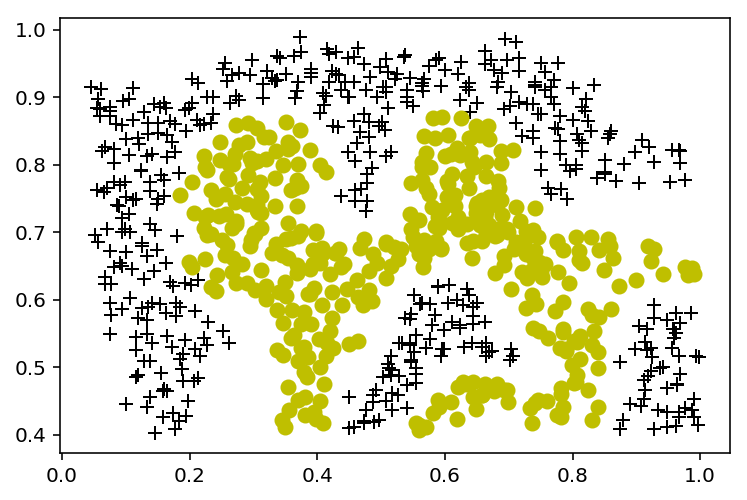

In [9]:
# Load from ex6data2:
# You will have X, y in your environment
data2 = scipy.io.loadmat('data/ex6data2.mat')
X2 = data2['X']
y2 = data2['y'].flatten()

# Plot training data
plotData(X2, y2)

## Part 5: Training SVM with RBF Kernel (Dataset 2)
After you have implemented the kernel, we can now use it to train the SVM classifier.

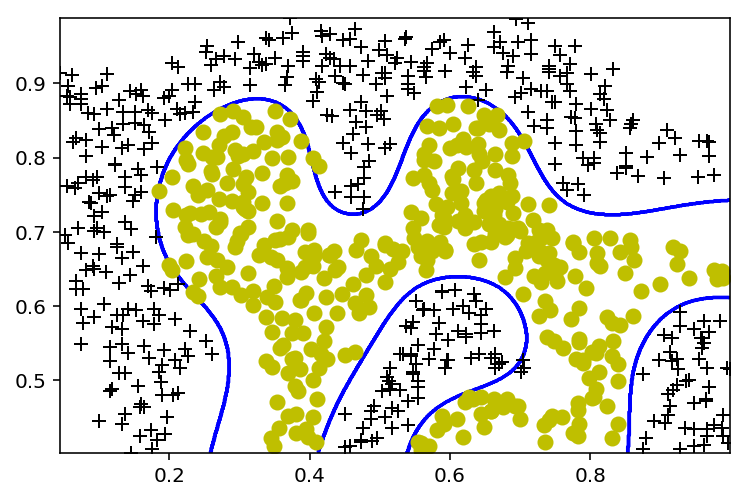

In [10]:
# SVM Parameters
C = 1
sigma = 0.1
gamma = 1.0 / (2.0 * sigma ** 2)

# We set the tolerance and max_passes lower here so that the code will run
# faster. However, in practice, you will want to run the training to
# convergence.

clf = svm.SVC(C=C, gamma=gamma)
model = clf.fit(X2, y2)
visualizeBoundary(X2, y2, model)

## Part 6: Visualizing Dataset 3
The following code will load the next dataset into your environment and plot the data.

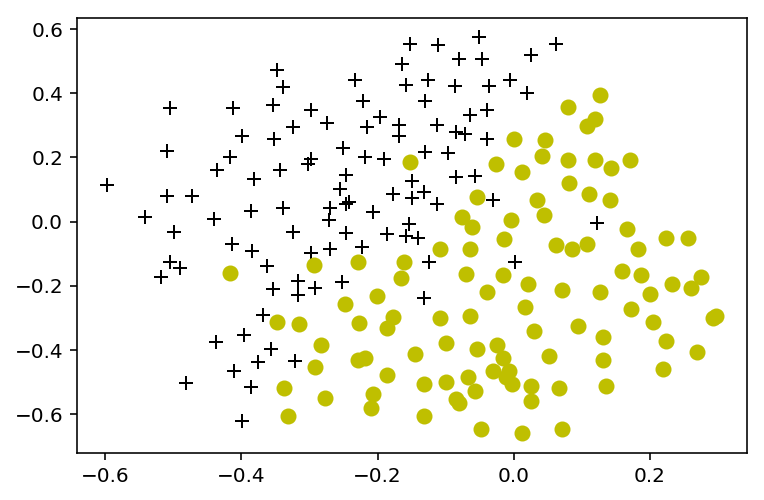

In [11]:
# Load from ex6data3:
# You will have X, y in your environment
data3 = scipy.io.loadmat('data/ex6data3.mat')
X3 = data3['X']
y3 = data3['y'].flatten()

# Plot training data
plotData(X3, y3)

## Part 7: Training SVM with RBF Kernel (Dataset 3)
This is a different dataset that you can use to experiment with. Try different values of C and sigma here.

C:1.000000 Sigma:0.100000 Gamma:49


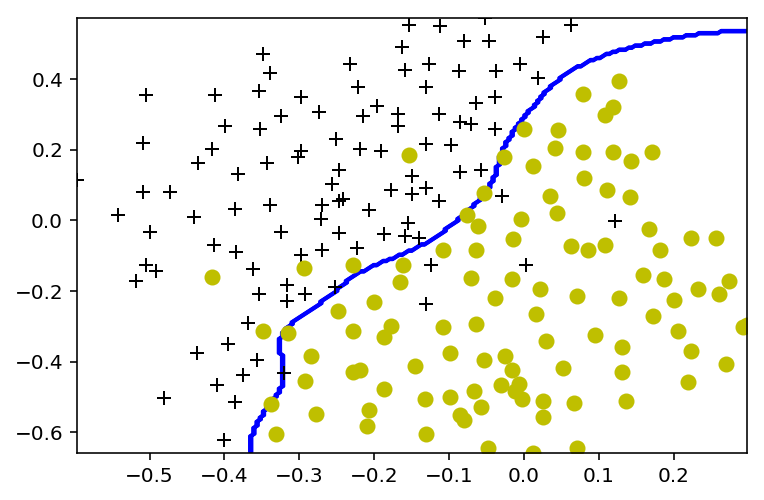

In [12]:
X3val = data3['Xval']
y3val = data3['yval'].flatten()

# Try different SVM Parameters here
C, sigma = dataset3Params(X3, y3, X3val, y3val)
gamma = 1.0 / (2.0 * sigma ** 2)
# Train the SVM

print("C:%f Sigma:%f Gamma:%d" %(C, sigma, gamma))
clf = svm.SVC(C=C, gamma=gamma)
model = clf.fit(X3, y3)
visualizeBoundary(X3, y3, model)

# Email Spam
## Part 1: Email Preprocessing
To use an SVM to classify emails into Spam v.s. Non-Spam, you first need to convert each email
into a vector of features. In this part, you will implement the preprocessing steps for each email. 

You should complete the code in processEmail function to produce a word indices vector for a given email.

In [13]:
# Extract Features
file = open('data/emailSample1.txt', 'r')
file_contents = file.readlines()
word_indices  = processEmail(''.join(file_contents))

==== Processed Email ====
anyon
know
how
much
it
cost
to
host
web
well
it
depend
on
how
mani
your
expect
thi
can
be
anywher
from
less
than
number
month
to
coupl
of
dollar
number
you
should
httpaddr
or
perhap
if
your
run
someth
big
to
unsubscrib
yourself
from
thi
mail
list
send
an
email
to
emailaddr


## Part 2: Feature Extraction
Now, you will convert each email into a vector of features in R^n.

You should complete the code in emailFeatures function to produce a feature vector for a given email.

In [18]:
features = emailFeatures(word_indices)

# Print Stats
print('Length of feature vector: %d'% features.size)
print('Number of non-zero entries: %d'% (np.sum(features > 0) + 1))

Length of feature vector: 1899
Number of non-zero entries: 45


## Part 3: Train Linear SVM for Spam Classification
In this section, you will train a linear classifier to determine if an email is Spam or Not-Spam.

After you have completed the feature extraction functions, the next step of spam will load a preprocessed training dataset that will be used to train a SVM classifier. spamTrain.mat contains 4000 training examples of spam and non-spam email, while spamTest.mat contains 1000 test examples. Each original email was processed using the processEmail and emailFeatures
functions and converted into a vector $x^{(i)} e  R^{1899}$.

After loading the dataset, ex6 spam.m will proceed to train a SVM to classify between spam (y = 1) and non-spam (y = 0) emails. Once the training completes, you should see that the classifier gets a training accuracy of about 99.8% and a test accuracy of about 98.5%.

In [15]:
# Load the Spam Email dataset
# You will have X, y in your environment
data = scipy.io.loadmat('data/spamTrain.mat')
X = data['X']
y = data['y'].flatten()

print('Training Linear SVM (Spam Classification)')
print('(this may take 1 to 2 minutes) ...')

C = 0.1
clf = svm.SVC(C=C, kernel='linear')
model = clf.fit(X, y)

p = model.predict(X)

print('Training Accuracy: ', np.mean(np.double(p == y)) * 100)

Training Linear SVM (Spam Classification)
(this may take 1 to 2 minutes) ...
Training Accuracy:  99.825


## Part 4: Test Spam Classification
After training the classifier, we can evaluate it on a test set. We have included a test set in spamTest.mat

In [16]:
# Load the test dataset
# You will have Xtest, ytest in your environment
data = scipy.io.loadmat('data/spamTest.mat')
Xtest = data['Xtest']
ytest = data['ytest']

print('Evaluating the trained Linear SVM on a test set ...')

p = model.predict(Xtest)

print('Test Accuracy: ', np. mean(np.double(p == ytest)) * 100)

Evaluating the trained Linear SVM on a test set ...
Test Accuracy:  57.1808


## Part 5: Top Predictors of Spam
Since the model we are training is a linear SVM, we can inspect the weights learned by the model to understand better how it is determining whether an email is spam or not. The following code finds the words with the highest weights in the classifier. Informally, the classifier 'thinks' that these words are the most likely indicators of spam.

In [19]:
# Sort the weights and obtain the vocabulary list
t = sorted(list(enumerate(model.coef_[0])),key=lambda e: e[1], reverse=True)
vocabList = getVocabList()

print('Top predictors of spam: ')
for i, val in enumerate(t[:15]):
    print(' %-15s (%f)' %(vocabList[val[0]], val[1]))

Top predictors of spam: 
 our             (0.500614)
 click           (0.465916)
 remov           (0.422869)
 guarante        (0.383622)
 visit           (0.367710)
 basenumb        (0.345064)
 dollar          (0.323632)
 will            (0.269724)
 price           (0.267298)
 pleas           (0.261169)
 most            (0.257298)
 nbsp            (0.253941)
 lo              (0.253467)
 ga              (0.248297)
 hour            (0.246404)


## Part 6: Try Your Own Emails
Now that you've trained the spam classifier, you can use it on your own emails! In the starter code, we have included spamSample1.txt, spamSample2.txt, emailSample1.txt and emailSample2.txt as examples.

The following code reads in one of these emails and then uses your learned SVM classifier to determine whether the email is Spam or Not Spam

In [20]:
# Set the file to be read in (change this to spamSample2.txt,
# emailSample1.txt or emailSample2.txt to see different predictions on
# different emails types). Try your own emails as well!
filenames = ['spamSample1.txt', 'spamSample2.txt', 'emailSample1.txt', 'emailSample2.txt']

for filename in filenames:
    # Read and predict
    file = open('data/%s' % filename)
    file_contents = file.readlines()
    word_indices = processEmail(''.join(file_contents))
    x = emailFeatures(word_indices)
    p = model.predict(x.reshape(1, -1))

    print('Processed %s\n\nSpam Classification: %d' % (filename, p))
    print('(1 indicates spam, 0 indicates not spam)')

==== Processed Email ====
do
you
want
to
make
dollar
number
or
more
per
week
if
you
ar
motiv
and
qualifi
individu
will
person
to
you
system
that
will
make
you
dollar
number
number
per
week
or
more
thi
is
not
call
our
number
hour
number
to
get
the
detail
number
number
number
need
peopl
who
want
to
make
seriou
monei
make
the
call
and
get
the
fact
invest
number
minut
in
yourself
now
number
number
number
look
forward
to
your
call
and
will
introduc
you
to
peopl
like
yourself
who
ar
current
make
dollar
number
number
plu
per
week
number
number
number
number
number
number
number
number
Processed spamSample1.txt

Spam Classification: 1
(1 indicates spam, 0 indicates not spam)
==== Processed Email ====
best
bui
gener
onlin
number
number
dollar
number
free
discount
top
sell
number
qualiti
guarante
we
accept
visa
master
payment
number
custom
httpaddr
Processed spamSample2.txt

Spam Classification: 1
(1 indicates spam, 0 indicates not spam)
==== Processed Email ====
anyon
know
how
much
it
cost
to
h

## Final: Submit results into Coursera

In [21]:
%run -n main.py
submit()

==
== Submitting Solutions | Programming Exercise support-vector-machines
==
Use token from last successful submission? (Y/n):y
==== Processed Email ====
the
quick
jump
over
the
Ok
==
==                                   Part Name |     Score | Feedback
==                                   --------- |     ----- | --------
==                             Gaussian Kernel |  25 /  25 | Nice work!
==         Parameters (C, sigma) for Dataset 3 |  25 /  25 | Nice work!
==                         Email Preprocessing |  25 /  25 | Nice work!
==                    Email Feature Extraction |  25 /  25 | Nice work!
==                                 ---------------------------
==                                             | 100 / 100 |  

==
